In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = (pd.read_excel('/content/drive/MyDrive/Machine_learning/LSTM_RNN/OysteinsRoom-230210-2333.xlsx'))

# Inspecting the dataset

In [ ]:
print(df.shape)
df

(796, 7)


,id,createAt,payload,RIGHT,LEFT,temperature,ON/OFF
0,message_75fadf50-7cb9-435f-a356-f1dd0f355f9a,2023-02-10 10:19:17:945,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON
1,message_d3af4c36-f6a7-4a81-9436-c15950b0471e,2023-02-10 10:20:17:950,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON
2,message_45c7df3e-02b4-48a5-af47-9d327bfa51cd,2023-02-10 10:21:17:955,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON
3,message_a8fa07e5-a32d-41b4-bcf5-1ca304d656fc,2023-02-10 10:22:17:950,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON
4,message_1b260b86-0884-4bde-b5bb-2248f96ef68d,2023-02-10 10:23:17:950,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON
...,...,...,...,...,...,...,...
791,message_5bffa05d-3726-4bb1-954f-514a56260b35,2023-02-10 23:29:16:999,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",19.2}},19.2,19.2,ON
792,message_32540447-1e3e-44b9-9893-b00d0f58c64e,2023-02-10 23:30:17:002,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",19.2}},19.2,19.2,ON
793,message_9f203e0c-0070-461e-ba7d-7516eb27e205,2023-02-10 23:31:16:985,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",19.1}},19.1,19.1,ON
794,message_80c1032f-3afc-4368-aab2-cd0432f4f827,2023-02-10 23:32:16:978,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",19.1}},19.1,19.1,ON


In [ ]:
df._get_numeric_data().columns

Index(['LEFT', 'temperature'], dtype='object')

In [ ]:
df.select_dtypes(include = ["object"]).columns

Index(['id', 'createAt', 'payload', 'RIGHT', 'ON/OFF'], dtype='object')

In [ ]:
df['createAt'] = pd.to_datetime(df['createAt'], utc= True, yearfirst=True, format='%Y-%m-%d %H:%M:%S:%f')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   id           796 non-null    object             
 1   createAt     796 non-null    datetime64[ns, UTC]
 2   payload      796 non-null    object             
 3   RIGHT        796 non-null    object             
 4   LEFT         796 non-null    float64            
 5   temperature  796 non-null    float64            
 6   ON/OFF       796 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 43.7+ KB


In [ ]:
df['Year'] = df['createAt'].dt.year
df['Month'] = df['createAt'].dt.month
df['Day'] = df['createAt'].dt.day

df['Hour'] = df['createAt'].dt.hour
df['Min'] = df['createAt'].dt.minute
df['Sec'] = df['createAt'].dt.second
df.head(5)

,id,createAt,payload,RIGHT,LEFT,temperature,ON/OFF,Year,Month,Day,Hour,Min,Sec
0,message_75fadf50-7cb9-435f-a356-f1dd0f355f9a,2023-02-10 10:19:17.945000+00:00,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON,2023,2,10,10,19,17
1,message_d3af4c36-f6a7-4a81-9436-c15950b0471e,2023-02-10 10:20:17.950000+00:00,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON,2023,2,10,10,20,17
2,message_45c7df3e-02b4-48a5-af47-9d327bfa51cd,2023-02-10 10:21:17.955000+00:00,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON,2023,2,10,10,21,17
3,message_a8fa07e5-a32d-41b4-bcf5-1ca304d656fc,2023-02-10 10:22:17.950000+00:00,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON,2023,2,10,10,22,17
4,message_1b260b86-0884-4bde-b5bb-2248f96ef68d,2023-02-10 10:23:17.950000+00:00,"{""temperature"":{""id"":1,""txt"":""temperature"",""t""...",20.5}},20.5,20.5,ON,2023,2,10,10,23,17


In [ ]:
df['RIGHT']

0      20.5}}
1      20.5}}
2      20.5}}
3      20.5}}
4      20.5}}
        ...  
791    19.2}}
792    19.2}}
793    19.1}}
794    19.1}}
795    19.1}}
Name: RIGHT, Length: 796, dtype: object

In [ ]:
df = df.drop('createAt', axis=1)
df = df.drop('LEFT', axis=1)
df = df.drop('RIGHT', axis=1)
df = df.drop('id', axis=1)
df = df.drop('payload', axis=1)

# Encode the dataset

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  796 non-null    float64
 1   ON/OFF       796 non-null    object 
 2   Year         796 non-null    int64  
 3   Month        796 non-null    int64  
 4   Day          796 non-null    int64  
 5   Hour         796 non-null    int64  
 6   Min          796 non-null    int64  
 7   Sec          796 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 49.9+ KB


In [ ]:
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df2 = df.copy()

for x in df2.select_dtypes(include = ["object"]).columns:
  df2[x]= label_encoder.fit_transform(df2[x])
df2

,temperature,ON/OFF,Year,Month,Day,Hour,Min,Sec
0,20.5,1,2023,2,10,10,19,17
1,20.5,1,2023,2,10,10,20,17
2,20.5,1,2023,2,10,10,21,17
3,20.5,1,2023,2,10,10,22,17
4,20.5,1,2023,2,10,10,23,17
...,...,...,...,...,...,...,...,...
791,19.2,1,2023,2,10,23,29,16
792,19.2,1,2023,2,10,23,30,17
793,19.1,1,2023,2,10,23,31,16
794,19.1,1,2023,2,10,23,32,16


Text(0, 0.5, 'Temp')

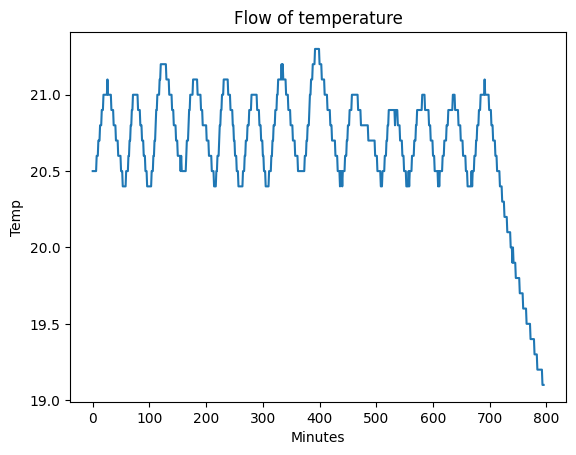

In [ ]:
df2 = df2.drop(['Year', 'Month', 'Day', 'Sec'], axis = 1)
xpoints = np.arange(0,len(df2))
plt.plot(xpoints, df2.temperature)
plt.title('Flow of temperature')
plt.xlabel('Minutes')
plt.ylabel('Temp')

In [ ]:
df2

,temperature,ON/OFF,Hour,Min
0,20.5,1,10,19
1,20.5,1,10,20
2,20.5,1,10,21
3,20.5,1,10,22
4,20.5,1,10,23
...,...,...,...,...
791,19.2,1,23,29
792,19.2,1,23,30
793,19.1,1,23,31
794,19.1,1,23,32


# Transform data from 2D tensor to 3D tensor

In [ ]:
df2.shape

(796, 4)

In [ ]:
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
X6 = []
X7 = []
y_switch = []
y_temp = []

ts = 1

# Divide each feature in 1 timesteps each
for i in range(0, df2.shape[0]-ts):
  X0.append(df2.iloc[i:i + ts, 0])
  X1.append(df2.iloc[i:i + ts, 1])
  X2.append(df2.iloc[i:i + ts, 2])
  X3.append(df2.iloc[i:i + ts, 3])


  y_temp.append(df2.iloc[i + ts, 0])

In [ ]:
X0, X1, X2,X3, y_switch, y_temp = np.array(X0), np.array(X1), np.array(X2), np.array(X3), np.array(y_switch), np.array(y_temp)

In [ ]:
y_temp[0]

20.5

In [ ]:
y_temp = y_temp.reshape(len(y_temp),1)

In [ ]:
y_temp.shape
# source for the convertion: https://www.youtube.com/watch?v=Ng_uGKcWfIo

(795, 1)

In [ ]:
X0[0], y_temp[0]

(array([20.5]), array([20.5]))

# Preprocessing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))

X0_scale = scaler.fit_transform(X0)

X1_scale = scaler.fit_transform(X1)

X2_scale = scaler.fit_transform(X2)

X3_scale = scaler.fit_transform(X3)

y_temp_scale = scaler.fit_transform(y_temp)

In [ ]:
X = np.stack([X0_scale, X1_scale, X2_scale, X3_scale], axis=2)
X.shape, y_temp_scale.shape

((795, 1, 4), (795, 1))

In [ ]:
X[0], X0_scale[0]

(array([[0.63636364, 1.        , 0.        , 0.3220339 ]]),
 array([0.63636364]))

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_temp_scale, test_size=0.33)

In [ ]:
X_train.shape, y_train.shape

((532, 1, 4), (532, 1))

# Creating the models

In [ ]:
#from keras.optimizers.optimizer_experimental import optimizer
#from keras.optimizers.
def LSTM_Model(X,Y,bs,ep, shape1, shape2):
  model = keras.Sequential()
  model.add(keras.Input(shape=(shape1, shape2)))
  model.add(keras.layers.LSTM(25, return_sequences = False)) # 25 best
  model.add(keras.layers.Dense(10))
  model.add(keras.layers.Dense(1))

  print(model.summary())

  loss = keras.losses.BinaryCrossentropy(from_logits = True)
  opt = keras.optimizers.Adam(learning_rate = 0.001)
  met = ['accuracy']

  model.compile(optimizer = opt, loss = loss, metrics = met)
  model.fit(x = X, 
            y=Y,
            batch_size=bs,
            epochs=ep,
            validation_split = 0.25
            )

  return model

# Training the models

In [ ]:
batch_size = 32
epochs = 5

model_lstm_temp = LSTM_Model(X_train, y_train, batch_size, epochs, X_train.shape[1],X_train.shape[2])

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 25)                3000      
                                                                 
 dense_71 (Dense)            (None, 10)                260       
                                                                 
 dense_72 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,271
Trainable params: 3,271
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
13/13 [==============================] - 3s 54ms/step - loss: 0.6725 - accuracy: 0.0075 - val_loss: 0.6545 - val_accuracy: 0.0000e+00
Epoch 2/5
13/13 [==============================] - 0s 8ms/step - loss: 0.6418 - accuracy: 0.0075 - val_loss: 0.6268 - val_accuracy: 0.0000e+00
Epoch 3/5
13/13 [======

In [ ]:
#Saves the model
model_lstm_temp.save('/content/drive/MyDrive/Master_CPS/my_model_temp')

# Load the saved model

In [ ]:
# Loads the model
temp_model = keras.models.load_model("/content/drive/MyDrive/Master_CPS/my_model_temp")

# Evaluation of models

In [ ]:
temp_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 0.5780 - accuracy: 0.0038


[0.5779537558555603, 0.0038022813387215137]

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

testPred_temp = temp_model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
X_test[0][0], y_test[0], testPred_temp[0]

(array([0.63636364, 1.        , 0.53846154, 0.66101695]),
 array([0.63636364]),
 array([0.7277798], dtype=float32))

In [ ]:
testPred_temp_inverse = scaler_y.inverse_transform(testPred_temp)
temp_actual = scaler_y.inverse_transform(y_test)

In [ ]:
testPred_temp_inverse[0], temp_actual[0]

(array([20.701117], dtype=float32), array([20.5]))

In [ ]:
from sklearn.metrics import mean_squared_error

testScore = np.sqrt(mean_squared_error(temp_actual, testPred_temp_inverse[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.41 RMSE


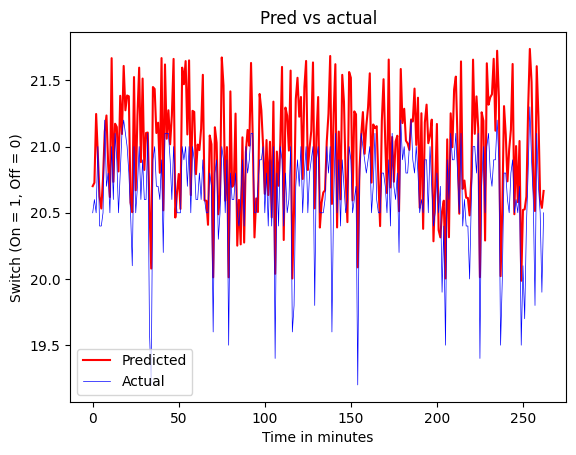

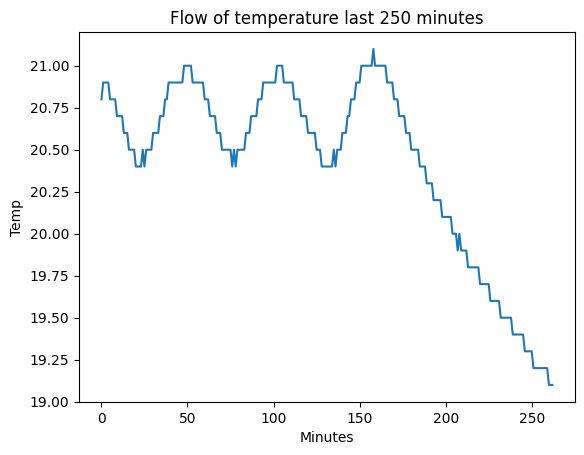

In [ ]:
Xpoints = np.arange(0, len(X_test))

plt.plot(Xpoints, testPred_temp_inverse, color = 'r', label = 'Predicted')
plt.plot(Xpoints, temp_actual, color = 'b' , linewidth = '0.5', label = 'Actual')
plt.title('Pred vs actual')
plt.xlabel('Time in minutes')
plt.ylabel('Switch (On = 1, Off = 0)')
plt.legend(loc = 'best')
plt.show()


plt.plot(np.arange(0,len(X_test)), df2.temperature.iloc[-X_test.shape[0]:])
plt.title('Flow of temperature last 250 minutes')
plt.xlabel('Minutes')
plt.ylabel('Temp')
plt.show()

#Prediction

1/1 [==============================] - 0s 23ms/step


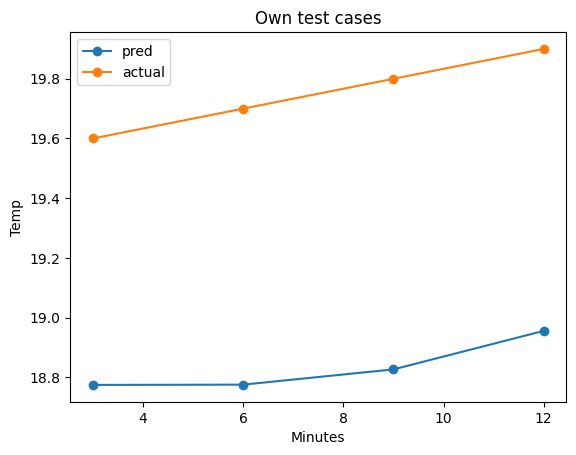

In [ ]:
tmp = np.array([[19.6],  [19.7] , [19.8] , [19.9] ])
switch = np.array([[1],  [1] , [1] , [1] ])
hour = np.array([[10],  [10.] , [10.] , [10.] ])
min = np.array([[3],  [6] , [9] , [12] ])

tmp_sc = scaler.transform(tmp)
switch_sc = scaler.transform(switch)
hour_sc = scaler.transform(hour)
min_sc = scaler.transform(min)

tmp_sc, switch_sc, hour_sc, min_sc = np.array(tmp_sc), np.array(switch_sc), np.array(hour_sc), np.array(min_sc)
test = np.stack([tmp_sc, switch_sc, hour_sc, min_sc], axis = 2)

test_pred = temp_model.predict(test)
test_pred_inverse = scaler.inverse_transform(test_pred)

plt.plot(min, test_pred_inverse, marker = 'o' ,label = 'pred')
plt.plot(min, tmp, marker = 'o' ,label = 'actual')
plt.title('Own test cases')
plt.xlabel('Minutes')
plt.ylabel('Temp')
plt.legend(loc = 'best')
plt.show()